<a href="https://colab.research.google.com/github/hanna-joo/statistics/blob/master/stat_python/ch_14_clustering_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14장. 군집분석 (Clustering Analysis)
- 14.1. 군집분석 기초
- 14.2. 계층적 군집분석
- 14.3. 비계층적 군집분석(K-평균 군집분석)

## 14.0. 준비하기

In [1]:
# 구글 드라이브 연동
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)       
          # print content of ROOT (Optional)
drive.mount(ROOT, force_remount=True)

/content/drive
Mounted at /content/drive


In [2]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = '/content/drive/My Drive/Colab Notebooks/python_stat/python_stat_data/pythondata'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

%cd "{PROJECT_PATH}"
%ls

/content/drive/My Drive/Colab Notebooks/python_stat/python_stat_data/pythondata
'실습파일_10장 분산분석.ipynb'
'실습파일_11장 회귀분석.ipynb'
'실습파일_12장 요인분석.ipynb'
'실습파일_13장 분류예측분석.ipynb'
'실습파일_14장 군집분석.ipynb'
'실습파일_15장 포지셔닝 분석.ipynb'
'실습파일_16장 컨조인트 분석.ipynb'
'실습파일_17장 비모수 통계분석.ipynb'
'실습파일_3장 파이썬 기초.ipynb'
'실습파일_4장 데이터전처리 및 기초분석.ipynb'
'실습파일_5장 기술통계분석.ipynb'
'실습파일_6장 t 검정.ipynb'
'실습파일_7장 상관관계분석.ipynb'
'실습파일_8장 범주형 데이터 분석.ipynb'
'실습파일_9장 신뢰성 분석.ipynb'
 Ashopping.csv
 CCA.csv
 Conjoint.csv
 Correspondence.csv
 부록_통계표.docx
 MDS1.csv
 MDS3.csv
'Step by Step 파이썬 비즈니스 통계분석_정오표.xlsx'


## 14.1. 군집분석 기초
- 군집분석
  + 집단 또는 범주에 대한 사전 정보가 없는 데이터의 경우,  
주어진 관측 값을 사용하여 전체를 몇 개의 유사한 집단으로 그룹화하여  
각 집단의 성격을 파악하기 위한 통계 분석기법
  + 분류 대상 개체들간의 유사성을 측정 및 유사성 높은 대상들을 그룹화하여  
데이터 전체의 구조와 특성 파악 가능
  + 분류 대상 개체
    + 물리적 개체(고객, 매장, 상품 등)  
    + 개념적 개체(구매유형, 고객의견, SNS 사용패턴, 휴대폰 통화유형 등)
- 군집분석의 종류
  + **계층적 군집분석**
    + 모든 개체들에 대해 순차적/계층적으로 군집 형성
    + 장점: 자료의 구조적 특성에 가장 적합한 군집 수 결정 가능하며 군집 형성과정을 비교적 명확하게 파악 가능
    + 단점: 분석 자료 크기가 커질수록 연산 오래 걸리고, 군집분석의 효율성 떨어짐
  + **비계층적 군집분석**
    + 계층적 군집분석 이외의 모든 군집분석 방법
    + K-평균 군집분석, 코호넨 네트워크 분석 많이 사용됨
    + 장점: **군집의 수를 미리 지정**해서 효율적인 군집형성이 빠르게 진행되기 때문에 대용량 데이터 군집분석 방법으로 적합
    + 단점: 해당 영역의 업무와 세분화에 대한 이해와 경험 필요 및 지정한 군집 수에 따라 군집들의 특성이 크게 달라질 수 있음


- 군집분석 과정: 군집분석 방법결정 > 분석변수 지정 > 이상치 제거 > 유사성 측정 > 군집화 > 군집특성 파악  
  1. **군집분석 방법결정**
    - 군집분석의 목적과 데이터 특성에 따라 최적의 군집분석 방법 결정
    - 계층적: 탐색적 목적이 강하거나 분류 개체의 규모가 크지 않을 경우  
    - 비계층적: 내부적으로 확정된 군집 수에 의해 대규모 분류 개체 적용할 경우  
  2. **분석변수 지정**
    - 유사성(거리)을 측정하는데 사용될 분석변수 지정 (군집 품질 좌우)
    - 가급적 수치형 척도로 측정된 변수들이 바람직
  3. **이상치 제거**
    - 분류대상 개체들의 분포 파악하여 극단값을 가지는 이상치(outlier) 분석에서 제외
  4. **유사성 측정**
    - 분석변수들의 특성을 바탕으로 적합한 유사성 측정방식 채택하여 군집간의 유사성 평가
    - 주로 사용되는 거리측정 방식: 유클리디안 거리, 맨하탄 거리, 피어슨 거리, 민코프스키 거리, 마할라노비스 거리 측정 방식 등
  5. **군집화**
    - 군집간의 거리(비유사성)를 바탕으로 유사한 개체/군집들을 묶어 동질적인 집단으로 형성
    - 군집화 방법 
      + 계층적: 최단 연결법, 최장 연결법, 평균 연결법, Ward 방법 등
      + 비계층적: 순차적 군집화, 동시 군집화, 최적할당 군집화 등
  6. **군집의 특성 파악**
    - 각 군집들에 대한 특성 파악 및 특성에 적합한 군집명 지정

- 유사성 측정 방법
  + 거리의 개념을 사용해 개체/군집들이 서로 얼마나 떨어져 있느냐 계산
  + 거리가 가까울수록 유사성이 크고, 멀수록 비유사성이 크다
    + 유클리디안 거리: 일반적으로 군집분석에서 가장 자주 사용되는 거리 측정방식
    + 민코프스키 거리: 유클리디안 거리와 맨하탄 거리를 일반화한 거리측정 모형
    + 마할라노비스 거리: 변수들의 단위 표준화 및 변수들간의 상호 연관성 고려한 거리 측정방식

  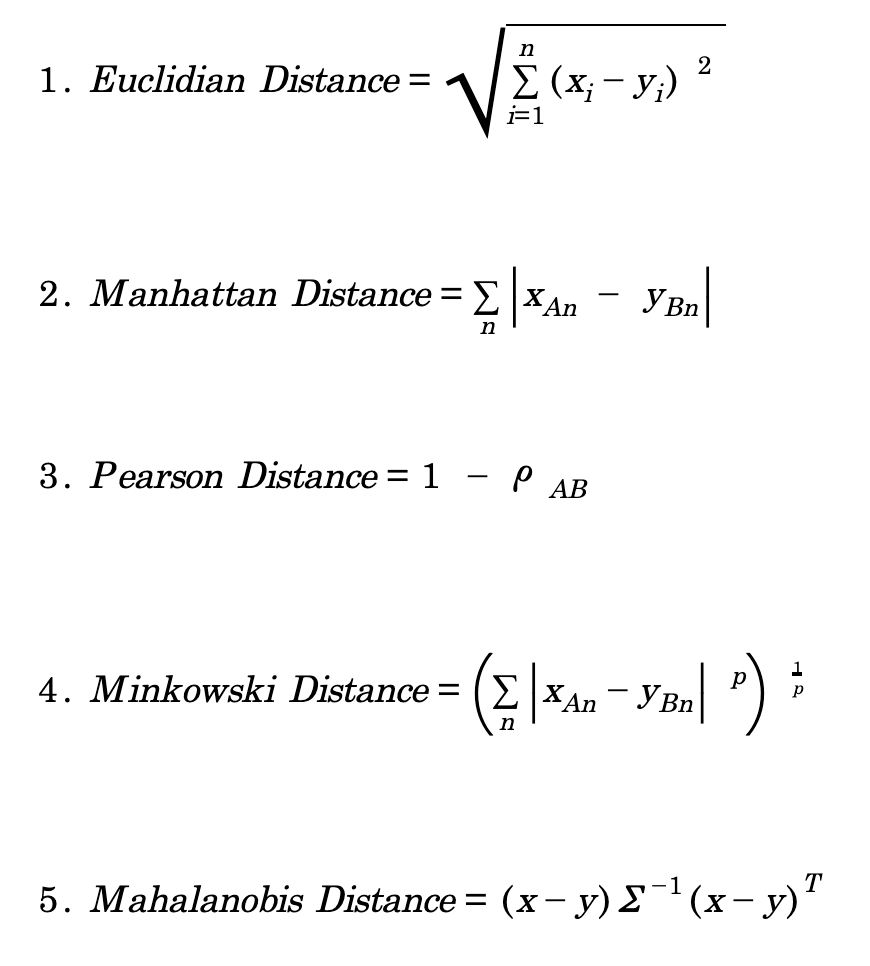
  


- 군집분석과 요인분석의 비교
  + 요인분석
    + R-타입: 요인추출의 대상이 변수
    + Q-타입: 요인추출의 대상이 응답자/사례
  + 분석목적 관점에서 군집분석과 Q-타입 요인분석이 동일하지만 군집 추출 방식에 차이 있음
    + Q-타입 요인분석: 통계적인 방법(응답자들의 평균 및 표준편차간의 상관관계에 기초)으로 응답자들 그룹화
    + 군집분석: 수리적인 방법(개체간의 거리 정보 계산)으로 응답자들 그룹화   

  ➡ 응답자들을 그룹화 할 경우 군집분석 이용하는 것이 바람직

## 14.2. 계층적 군집분석
- 군집 수가 사전에 정의되지 않았을 경우 개체들 계층적으로 군집화

### (1) 개념 및 주요 이론
